<a href="https://colab.research.google.com/github/blancosss21/F1-Driver-Performance-Analysis/blob/main/F1_Driver_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1 Driver Performance Analysis

## Overview
This project analyzes the performance of F1 drivers over the last 5 seasons (2022-2024) to identify the most consistent and fastest drivers.

## Data
Data was sourced from the Ergast API, which provides detailed information on F1 races.

## Steps
1. Collect race data from the 2020-2024 seasons.
2. Clean and prepare the data for analysis.
3. Perform exploratory data analysis (EDA).
4. Calculate the average position for each driver.
5. Visualize the results.

## Results
Drivers with the lowest average positions are the best performers over the last 5 seasons.

## Conclusion
This project successfully identified the most consistent and fastest drivers, providing a foundation for further analysis of F1 driver performance.


In [2]:
#Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [3]:
#Obtain tender data from the Ergast API
def get_race_data(season):
    url = f"https://ergast.com/api/f1/{season}/results.json?limit=1000"
    response = requests.get(url)
    data = response.json()
    races = data['MRData']['RaceTable']['Races']
    return races

In [4]:
#Defining the seasons
seasons = range(2020, 2025)

# Obtaining data for each season
all_races = []
for season in seasons:
    races = get_race_data(season)
    all_races.extend(races)

#Print if you want to see the Data in json format
#print(json.dumps(all_races[0], indent=2))

# Convert data into a pandas DataFrame
df = pd.json_normalize(all_races, 'Results',
                       ['season', 'round', 'raceName', 'date', ['Circuit', 'circuitName']],
                       record_prefix='_')

# Show the first rows of the DataFrame
df.head()


,_number,_position,_positionText,_points,_grid,_laps,_status,_Driver.driverId,_Driver.permanentNumber,_Driver.code,...,_FastestLap.rank,_FastestLap.lap,_FastestLap.Time.time,_FastestLap.AverageSpeed.units,_FastestLap.AverageSpeed.speed,season,round,raceName,date,Circuit.circuitName
0,77,1,1,25,1,71,Finished,bottas,77,BOT,...,2,68,1:07.657,kph,229.758,2020,1,Austrian Grand Prix,2020-07-05,Red Bull Ring
1,16,2,2,18,7,71,Finished,leclerc,16,LEC,...,4,64,1:07.901,kph,228.933,2020,1,Austrian Grand Prix,2020-07-05,Red Bull Ring
2,4,3,3,16,3,71,Finished,norris,4,NOR,...,1,71,1:07.475,kph,230.378,2020,1,Austrian Grand Prix,2020-07-05,Red Bull Ring
3,44,4,4,12,5,71,Finished,hamilton,44,HAM,...,3,67,1:07.712,kph,229.572,2020,1,Austrian Grand Prix,2020-07-05,Red Bull Ring
4,55,5,5,10,8,71,Finished,sainz,55,SAI,...,5,63,1:07.974,kph,228.687,2020,1,Austrian Grand Prix,2020-07-05,Red Bull Ring


In [5]:
# Convert columns to appropriate data types
df['_position'] = pd.to_numeric(df['_position'])
df['date'] = pd.to_datetime(df['date'])

# Select only columns of interest
df = df[['_Driver.driverId', '_position', 'season', 'raceName', 'date', 'Circuit.circuitName']]

# Rename columns for better readability
df.columns = ['driverId', 'position', 'season', 'raceName', 'date', 'circuitName']

# Show the first rows of the clean DataFrame
df.head()


,driverId,position,season,raceName,date,circuitName
0,bottas,1,2020,Austrian Grand Prix,2020-07-05,Red Bull Ring
1,leclerc,2,2020,Austrian Grand Prix,2020-07-05,Red Bull Ring
2,norris,3,2020,Austrian Grand Prix,2020-07-05,Red Bull Ring
3,hamilton,4,2020,Austrian Grand Prix,2020-07-05,Red Bull Ring
4,sainz,5,2020,Austrian Grand Prix,2020-07-05,Red Bull Ring


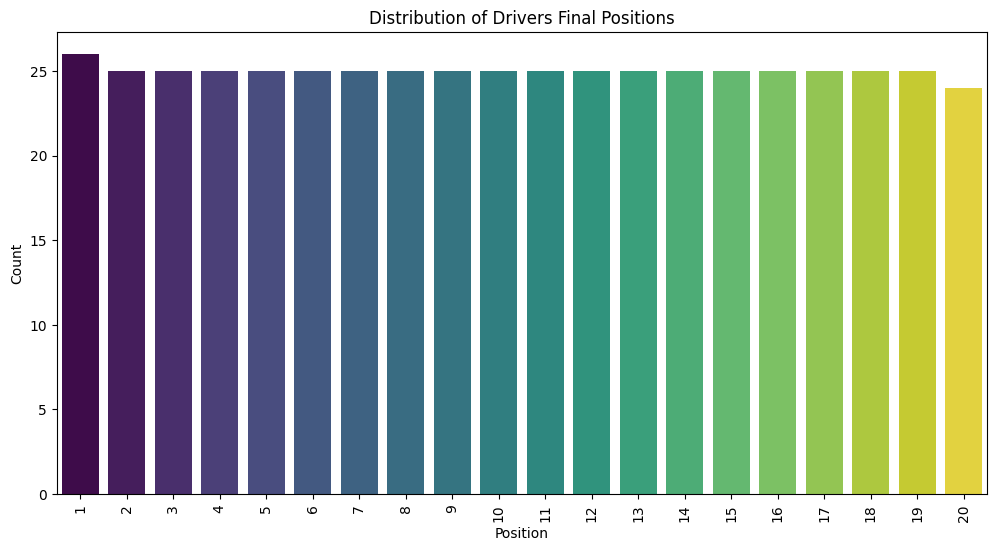

,position,date
count,500.000000,500
mean,10.462000,2022-04-30 17:22:33.600000
min,1.000000,2020-07-05 00:00:00
25%,5.000000,2021-04-18 00:00:00
50%,10.000000,2022-04-10 00:00:00
75%,15.000000,2023-04-30 00:00:00
max,20.000000,2024-05-05 00:00:00
std,5.771931,NaN


In [6]:
# Plot distribution of drivers' final positions
plt.figure(figsize=(12, 6))
sns.countplot(x='position', hue='position', data=df, palette='viridis', legend=False)
plt.title('Distribution of Drivers Final Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Calculate descriptive statistics
df.describe()

In [7]:
# Calculate average points and consistency (standard deviation of points) for each driver
driver_stats = df.groupby(['driverId']).agg(
    average_position=pd.NamedAgg(column='position', aggfunc='mean'),
    consistency=pd.NamedAgg(column='position', aggfunc='std')
).reset_index()

# Sort drivers by average position
driver_stats = driver_stats.sort_values(by='average_position')

# Display the driver statistics
driver_stats.head()

,driverId,average_position,consistency
14,max_verstappen,4.240000,6.603534
19,perez,4.478261,3.740072
8,hamilton,5.320000,4.298449
13,leclerc,6.560000,6.171710
2,bearman,7.000000,NaN


In [8]:
# Calcolare la posizione media per pilota
pilot_performance = df.groupby('driverId')['position'].mean().reset_index()
pilot_performance.columns = ['driverId', 'average_position']

# Ordinare i piloti per posizione media
pilot_performance = pilot_performance.sort_values(by='average_position')

# Mostrare le prime righe del DataFrame delle performance dei piloti
pilot_performance.head()


,driverId,average_position
14,max_verstappen,4.240000
19,perez,4.478261
8,hamilton,5.320000
13,leclerc,6.560000
2,bearman,7.000000


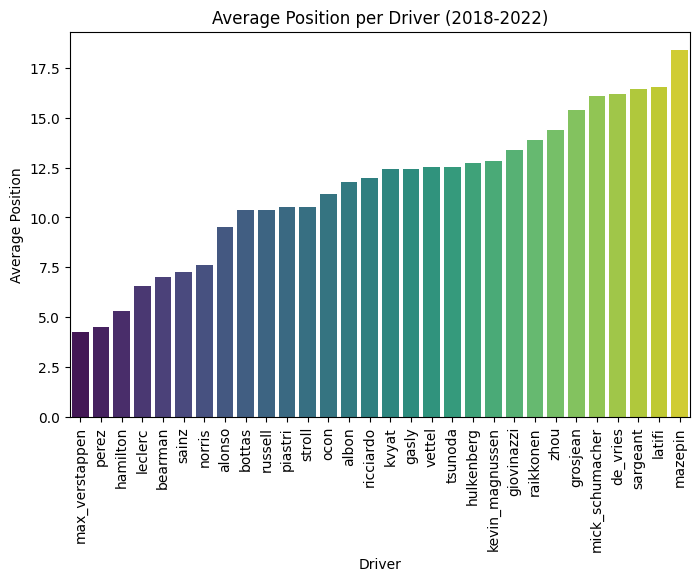

In [9]:
# Plot average positions per driver
plt.figure(figsize=(8, 5))
sns.barplot(x='driverId', y='average_position', data=driver_stats, palette='viridis', hue='driverId', legend=False)

plt.title('Average Position per Driver (2018-2022)')
plt.xlabel('Driver')
plt.ylabel('Average Position')
plt.xticks(rotation=90)
plt.show()



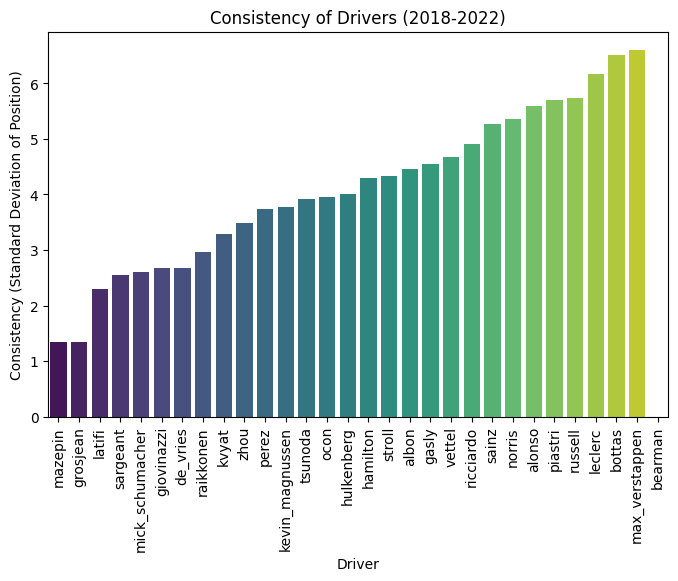

In [10]:
# Plot consistency (standard deviation of positions) per driver
driver_stats = driver_stats.sort_values(by='consistency')
plt.figure(figsize=(8, 5))
sns.barplot(x='driverId', y='consistency', data=driver_stats, palette='viridis', hue='driverId', legend=False)

plt.title('Consistency of Drivers (2018-2022)')
plt.xlabel('Driver')
plt.ylabel('Consistency (Standard Deviation of Position)')
plt.xticks(rotation=90)
plt.show()

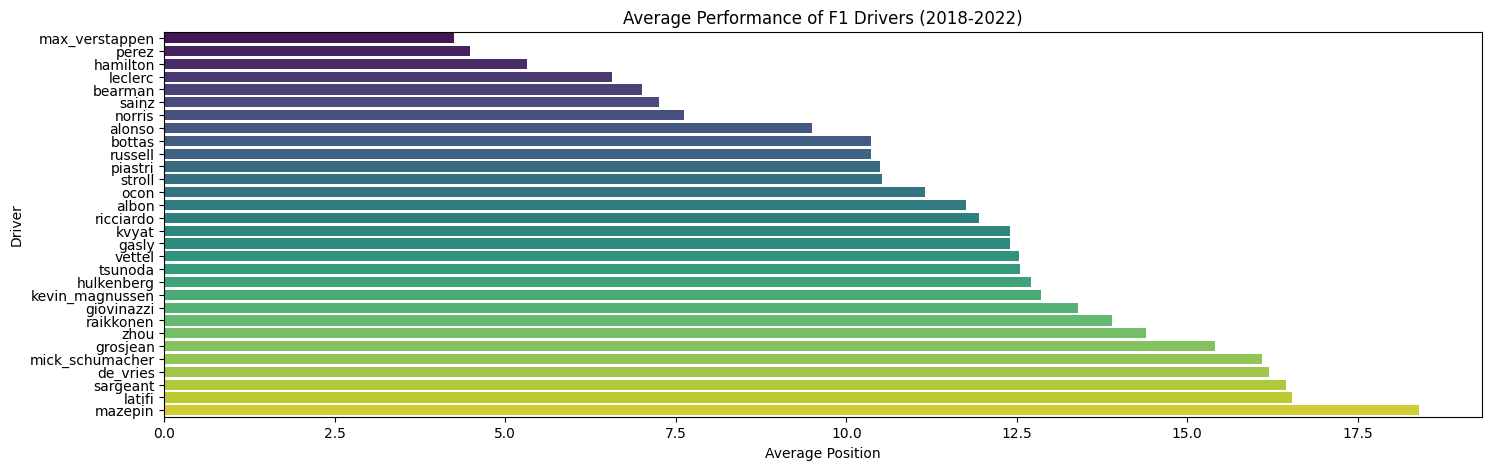

In [11]:
# Visualization of Driver Performance
plt.figure(figsize=(17, 5))
sns.barplot(x='average_position', y='driverId', data=pilot_performance, palette='viridis', hue='driverId', legend=False)
plt.title('Average Performance of F1 Drivers (2020-2024)')
plt.xlabel('Average Position')
plt.ylabel('Driver')
plt.show()


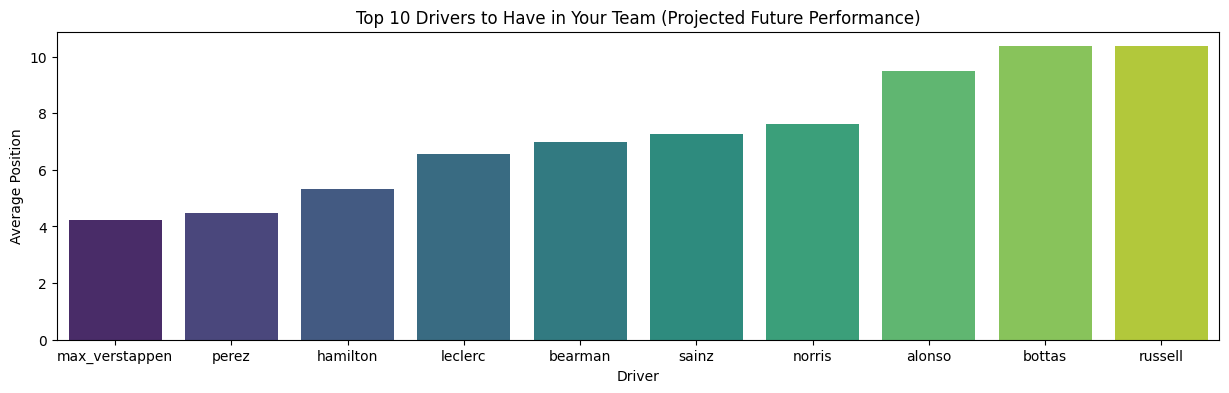

In [12]:
# Calculate the top 10 drivers based on average position
top_drivers = pilot_performance.nsmallest(10, 'average_position')

# Visualization of Top 10 Drivers
plt.figure(figsize=(15, 4))  # Increased height
sns.barplot(y='average_position', x='driverId', hue='driverId', data=top_drivers, palette='viridis', dodge=False)
plt.title('Top 10 Drivers to Have in Your Team (Projected Future Performance)')
plt.ylabel('Average Position')
plt.xlabel('Driver')
plt.legend([],[], frameon=False)

plt.show()


In [13]:
# Calculate the top 10 drivers based on average position
top_drivers = pilot_performance.nsmallest(10, 'average_position')

# Sort the top drivers by average position to ensure correct order
top_drivers = top_drivers.sort_values(by='average_position')

# Display the top drivers in a structured format
print("Top 10 Drivers to Consider for Future Teams (Projected Performance)")
print("\n| Rank | Driver ID        | Average Position    |")
print("|------|------------------|---------------------|")
for rank, row in enumerate(top_drivers.itertuples(), start=1):
    print("| {:<4} | {:<16} | {:<19} |".format(rank, row.driverId, row.average_position))


Top 10 Drivers to Consider for Future Teams (Projected Performance)

| Rank | Driver ID        | Average Position    |
|------|------------------|---------------------|
| 1    | max_verstappen   | 4.24                |
| 2    | perez            | 4.478260869565218   |
| 3    | hamilton         | 5.32                |
| 4    | leclerc          | 6.56                |
| 5    | bearman          | 7.0                 |
| 6    | sainz            | 7.25                |
| 7    | norris           | 7.615384615384615   |
| 8    | alonso           | 9.5                 |
| 9    | bottas           | 10.36               |
| 10   | russell          | 10.36               |


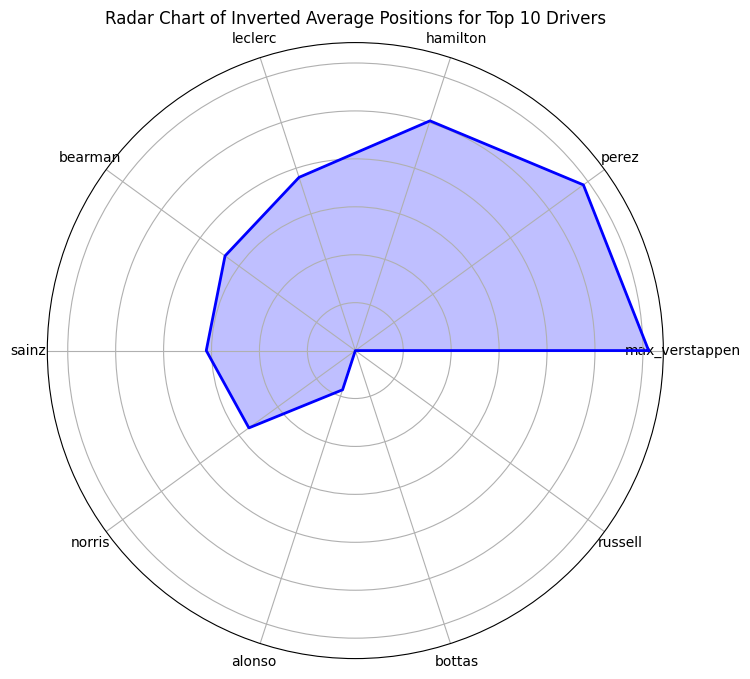

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
# Assuming pilot_performance is defined somewhere in your code

# Calculate the top 10 drivers based on average position
top_drivers = pilot_performance.nsmallest(10, 'average_position')

# Sort the top drivers by average position to ensure correct order
top_drivers = top_drivers.sort_values(by='average_position')





# Visualization 2: Radar Chart
labels = top_drivers['driverId'].tolist()
values = top_drivers['average_position'].tolist()
num_vars = len(labels)

# Invert the average positions for the radar chart (lower is better)
max_position = max(values)
inverted_values = [max_position - value for value in values]  # Invert the values

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
inverted_values += inverted_values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, inverted_values, color='blue', alpha=0.25)
ax.plot(angles, inverted_values, color='blue', linewidth=2)

# Labels for each angle
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Radar Chart of Inverted Average Positions for Top 10 Drivers')
plt.show()
